---
title: "Rotate image using warp affine transform"
description: "In this tutorial we are going to learn how to rotate an image using the `kornia.gemetry` components."
author:
    - "Edgar Riba"
date: 07-06-2021
categories:
    - Basic
    - Affine
    - kornia.geometry
image: "../tutorials/assets/rotate_affine.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/rotate_affine.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/bennett_aden.png"
download_image(url)

'bennett_aden.png'

In [ ]:
import cv2
import kornia as K
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt

load the image using kornia

In [ ]:
x_img = K.io.load_image("bennett_aden.png", K.io.ImageLoadType.RGB32)[None, ...]  # BxCxHxW

In [ ]:
def imshow(input: torch.Tensor, size: tuple = None):
    out = torchvision.utils.make_grid(input, nrow=4, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.figure(figsize=size)
    plt.imshow(out_np)
    plt.axis("off")
    plt.show()

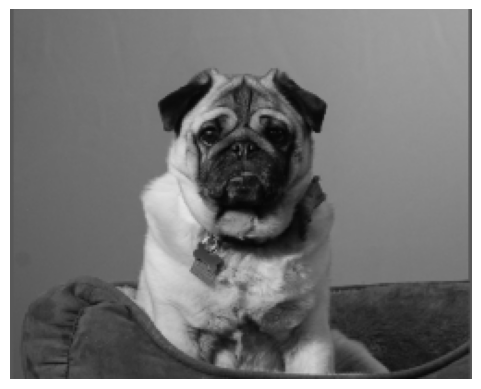

In [ ]:
imshow(x_img)

## Define the rotation matrix

In [ ]:
# create transformation (rotation)
alpha: float = 45.0  # in degrees
angle: torch.tensor = torch.ones(1) * alpha

# define the rotation center
center: torch.tensor = torch.ones(1, 2)
center[..., 0] = x_img.shape[3] / 2  # x
center[..., 1] = x_img.shape[2] / 2  # y

# define the scale factor
scale: torch.tensor = torch.ones(1, 2)

# compute the transformation matrix
M: torch.tensor = K.geometry.get_rotation_matrix2d(center, angle, scale)  # 1x2x3

## Apply the transformation to the original image

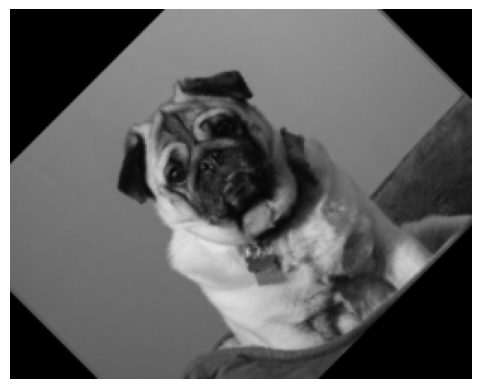

In [ ]:
_, _, h, w = x_img.shape
x_warped: torch.tensor = K.geometry.warp_affine(x_img, M, dsize=(h, w))

imshow(x_warped)

## Rotate a batch of images

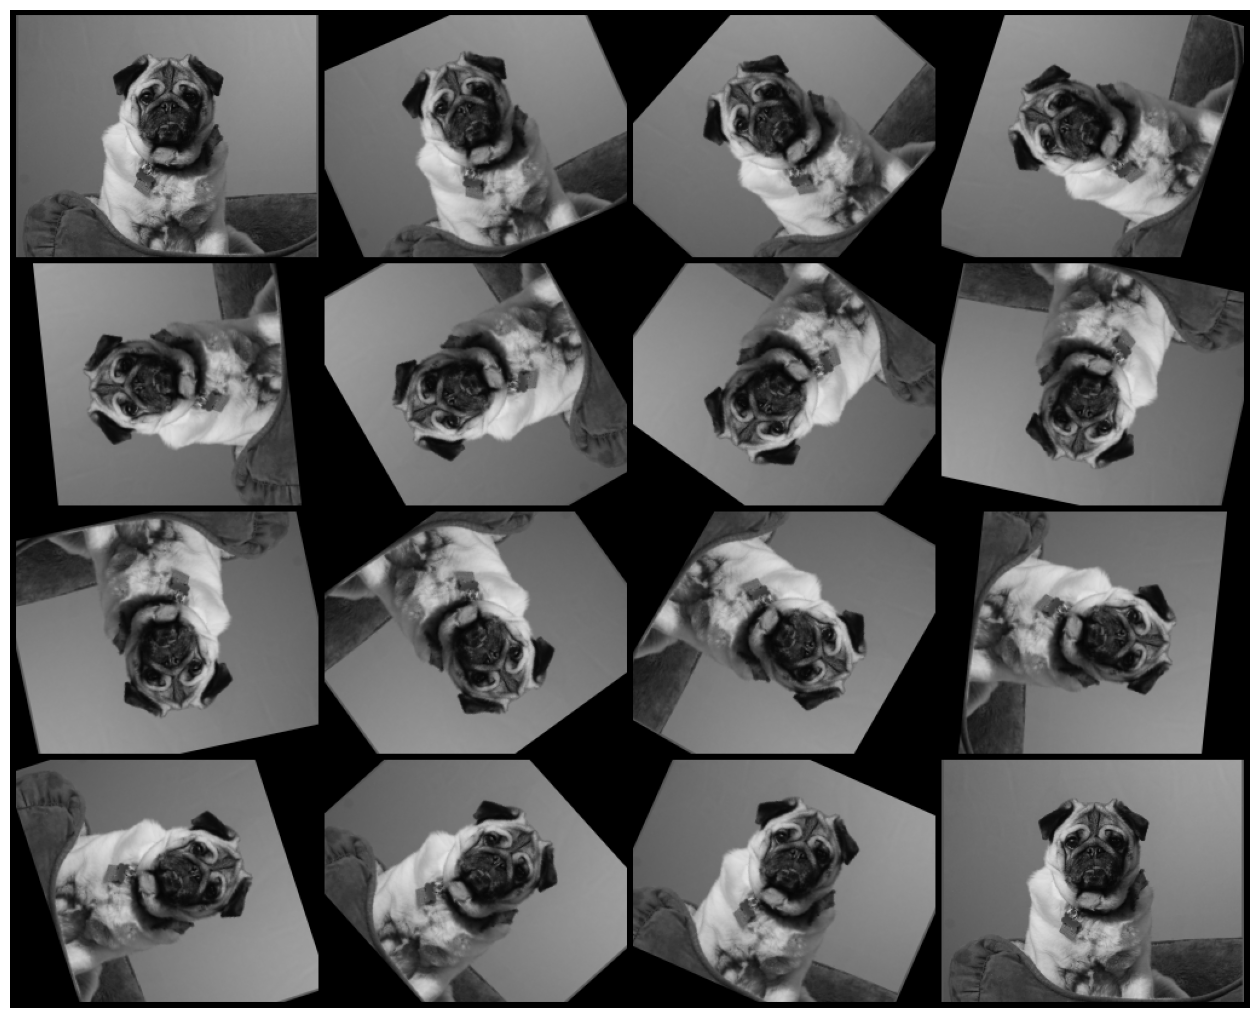

In [ ]:
x_batch = x_img.repeat(16, 1, 1, 1)
x_rot = K.geometry.rotate(x_batch, torch.linspace(0.0, 360.0, 16))

imshow(x_rot, (16, 16))